# Week 12 - Supervised Learning 

This week will be a bit odd as you will be doing the tutorials alongside the lectures. Between this tutorial and the exam review there will not be a lot of time during the tutorial for me to teach the basics and then have you practice coding. For this reason I have provided links to online tutorials to learn how to code some basic classifiers by yourself and I will go through the confusion matrix in the tutorials (on the board). The confusion matrix is something you can do without a computer that is relatively easy to grasp without having gone to the lectures first. I encourage you to revisit links to the online classifier tutorials after the week 12 lectures.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import neighbors
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

## Classification Algorithms 

[Intro to Machine Learning](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Learning problems fall into a few categories:

- **Supervised learning**, in which the data comes with additional attributes that we want to predict [Click here to go to the scikit-learn supervised learning page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).This problem can be either:

 - **Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
 - **Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- **Unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization [Click here to go to the Scikit-Learn unsupervised learning page](https://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning).



### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties; we call the other set the **testing set**, on which we test the learned properties.


To learn about classifiers will will be making use of the **sklearn library**. This library has some awesome tutorials and example datasets. One such dataset is the **Iris dataset**. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [2]:
# load in the dataset
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
petal_data = iris.data
labels = iris.target
target_names = iris.target_names
print('target names:\n', iris.target_names)
print('\nFirst 10 rows of data:\n', petal_data[:10])
print('\ntarget labels:', labels)

target names:
 ['setosa' 'versicolor' 'virginica']

First 10 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# We can perform a PCA to get a look at the data 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(petal_data)

print(f'explained variance ratio (first two components): {str(pca.explained_variance_ratio_)}')

explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

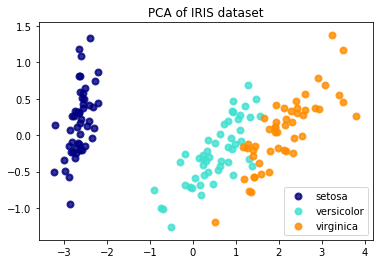

In [5]:
# plotting the PCA
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

### Split training and test data
To properly evaluate our model, we need to split the data into training and test sets.
The 'petal_data' is our data, and the 'labels' are each datapoint's class. 
Remember we want to guess (classify) a new iris flower to its correct label (iris flower type) given its petal data.

train_test_split will need to be given the petal_data, and the labels so it can split the data and labels in the same manner.
look up the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to find how to do this.

In [ ]:
from sklearn.model_selection import train_test_split
# create training petal_data, training labels, test petal_data, test lables using train_test_split()


### Naive Bayes
[Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
# copy and paste the code from this tutorial and see if you can perform Gaussian Naive Bayes classification on the Iris dataset

### K Nearest Neighbours

Sample usage of [Nearest Neighbors classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py). It will plot the decision boundaries for each class.

In [ ]:
# copy and paste the code from this tutorial and see if you can perform Nearest Neighbours classification on the Iris dataset

### Support Vector Machine
Comparison of different [linear SVM classifiers](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width


In [ ]:
# copy and paste the code from this tutorial and see if you can perform SVM classification on the Iris dataset

graph## Confusion Matrix Generation 

By definition a confusion matrix $C$ is such that $C_ij$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

Which is fancy jargon for this guy: 

<img src = "./img/CM.png"  width= "500"/>

Which we can use to derive information about how well our classifiers performed

<img src = "./img/errorTypes.png" width= "400"/>

For example, lets say we have used one of the classifiers listed above on our training data and now we will asses how well it did by testing it on a separate dataset with 10 samples which results in the following confusion matrix: 

<img src = "./img/CM2.png" width= "400"/>

In python, you can code this with the following: 

In [1]:
from sklearn.metrics import confusion_matrix
y_true = ["T", "T", "T", "T", "F", "F", "F", "F", "F", "F"]
y_pred = ["T", "T", "T", "F", "T", "T", "F", "F", "F", "F"]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
# note: ravel just combines y_true and y_pred. Needed for confusion_matrix function.
print(f'tn: {tn}\nfp: {fp}\nfn: {fn}\ntp: {tp}')

tn: 4
fp: 2
fn: 1
tp: 3


Okay cool. But for our example, there are 3 classes. How do we calculate these statistics?<br>
We calculate each statistic for a single class. <br>
For example, we would find TP, TN, FP, FP for iris setova. Then we would do the same for iris virginica etc.

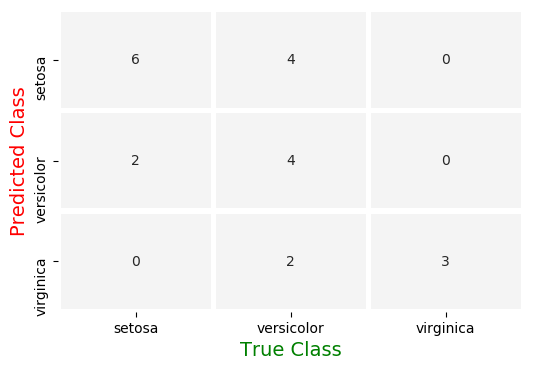

In [37]:
import seaborn as sns

y_true = [1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1]
y_pred = [0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1]

cmatrix = confusion_matrix(y_true, y_pred)
labels = ['setosa', 'versicolor', 'virginica']
df = pd.DataFrame(data=cmatrix, index=labels, columns=labels)

fig, ax = plt.subplots(dpi=100)
sns.heatmap(df, linewidth=3, cmap='Greys', robust=True, annot=True, vmin=-100, vmax=1000, fmt="d", ax=ax, square=False, cbar=False)
plt.xlabel('True Class', c='green', size=14)
plt.ylabel('Predicted Class', c='red', size=14)
plt.show()

### Accuracy

>How often is the classifier correct?

$ACC = \frac{TP + TN}{TP + TN + FP + FN}$

Given the above equation, what is the accuracy of your classifier?

In [ ]:
# calculate and print Accuracy statistic using the formula above and pre-calculated tn, fp, fn, tp variables

### Precision 

>When it predicts the positive result, how often is it correct?

$PPV = \frac{TP}{TP + FP}$

Given the above equation, what is the precision of your classifier?

In [ ]:
# calculate and print Precision statistic using the formula above and pre-calculated tn, fp, fn, tp variables

### Recall (True Positive Rate)

> When it is actually the positive result, how often does it predict correctly?

$TPR = \frac{TP}{TP + FN}$

Given the above equation, what is the recall of your classifier?

In [ ]:
# calculate and print Recall statistic using the formula above and pre-calculated tn, fp, fn, tp variables

### False Positive Rate

> When it predicts a positive result, how often is it incorrect?

$FPR = \frac{FP}{FP + TN}$

Given the above equation, what is the FPR of your classifier?

In [ ]:
# calculate and print FPR using the formula above and pre-calculated tn, fp, fn, tp variables

### F1 score

> This is just the harmonic mean of precision and recall

$F_1 =  \frac{2*TP}{2*TP + FP + FN}$

Given the above equation, what is the F1 score of your classifier? 

In [ ]:
# calculate and print F1 using the formula above and pre-calculated tn, fp, fn, tp variables

In [ ]:
# hint at some helpful functions 
from sklearn.metrics import classification_report